# Minimum Viable Product (MVP) 

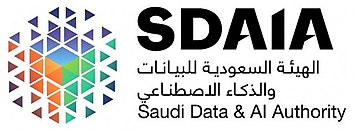

In [1]:
# import the liabraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Read dataset

In [2]:
# read the dataset from folder
dfs =[]

path = '/Users/abeeralruwayti/Desktop/bootcamp/Project'

for file in os.listdir(path):
    if file.split(".")[-1] == "csv":
        dfs.append(pd.read_csv(os.path.join(path,file)))
                 
df = pd.concat(dfs)

#df.to_csv("dataset.csv")

In [98]:
engine = create_engine('sqlite:///EDA_Project.db')

with open('dataset.csv', 'r') as file:
    data_df = pd.read_csv(file)
data_df.to_sql('table', con = engine, if_exists='replace')

In [106]:
all_tables = engine.table_names()
all_tables

<ipython-input-106-9dbbbb8bc6ba>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  all_tables = engine.table_names()


['table']

In [108]:
#table_data = pd.read_sql('SELECT * FROM tab  le;', engine)
#table_data

In [3]:
#display the dataframe
df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Unnamed: 0
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576,NaN
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619,NaN
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,NaN
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,NaN
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,NaN
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,NaN


# Data cleaning

In [4]:
# print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445220 entries, 0 to 209687
Data columns (total 12 columns):
 #   Column                                                                Dtype  
---  ------                                                                -----  
 0   C/A                                                                   object 
 1   UNIT                                                                  object 
 2   SCP                                                                   object 
 3   STATION                                                               object 
 4   LINENAME                                                              object 
 5   DIVISION                                                              object 
 6   DATE                                                                  object 
 7   TIME                                                                  object 
 8   DESC                                                 

In [5]:
# display the columns names
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'Unnamed: 0'],
      dtype='object')

In [6]:
# rename columns for easier coding later
df.rename(columns={'C/A': 'ca', 'UNIT': 'unit',
                   'SCP':'scp','STATION':'station',
                   'LINENAME':'linename','DIVISION':'division',
                   'DATE':'date','TIME':'time',
                   'DESC':'desc','ENTRIES':'entries_cum',
                   'EXITS                                                               ':'exits_cum'},inplace=True)

In [7]:
# rename check
df.columns

Index(['ca', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries_cum', 'exits_cum', 'Unnamed: 0'],
      dtype='object')

In [8]:
#display the first five rows
df.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,Unnamed: 0
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554,NaN
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563,NaN
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576,NaN
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619,NaN
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661,NaN


In [9]:
#display the last five rows & found unconsistent time difference
df.tail()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,Unnamed: 0
209683,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,NaN
209684,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,NaN
209685,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,NaN
209686,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,NaN
209687,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,07/09/2021,21:00:00,REGULAR,5554,585,NaN


In [10]:
# there is no null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5445220 entries, 0 to 209687
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ca           object 
 1   unit         object 
 2   scp          object 
 3   station      object 
 4   linename     object 
 5   division     object 
 6   date         object 
 7   time         object 
 8   desc         object 
 9   entries_cum  int64  
 10  exits_cum    int64  
 11  Unnamed: 0   float64
dtypes: float64(1), int64(2), object(9)
memory usage: 540.1+ MB


In [11]:
# double check for null values
df.isna().sum()

ca                   0
unit                 0
scp                  0
station              0
linename             0
division             0
date                 0
time                 0
desc                 0
entries_cum          0
exits_cum            0
Unnamed: 0     2722610
dtype: int64

In [12]:
#display the data type for each column
df.dtypes

ca              object
unit            object
scp             object
station         object
linename        object
division        object
date            object
time            object
desc            object
entries_cum      int64
exits_cum        int64
Unnamed: 0     float64
dtype: object

In [13]:
# remove specific character
df.scp.str.replace('/','-')

0         02-00-00
1         02-00-00
2         02-00-00
3         02-00-00
4         02-00-00
            ...   
209683    00-05-01
209684    00-05-01
209685    00-05-01
209686    00-05-01
209687    00-05-01
Name: scp, Length: 5445220, dtype: object

In [14]:
# display the unique values for control area column & check for consistency
df.ca.unique()

array(['A002', 'A006', 'A007', 'A010', 'A011', 'A013', 'A014', 'A015',
       'A016', 'A021', 'A022', 'A025', 'A027', 'A029', 'A030', 'A031',
       'A033', 'A034', 'A035', 'A037', 'A038', 'A039', 'A041', 'A042',
       'A043', 'A046', 'A047', 'A049', 'A050', 'A052', 'A053', 'A054',
       'A055', 'A058', 'A060', 'A061', 'A064', 'A066', 'A069', 'A071',
       'A077', 'A081', 'A082', 'A083', 'A084', 'A085', 'B004', 'B009',
       'B010', 'B012', 'B013', 'B014', 'B015', 'B016', 'B017', 'B018',
       'B019', 'B020', 'B021', 'B022', 'B023', 'B024', 'B024A', 'B025',
       'B026', 'B027', 'B028', 'B029', 'B031', 'B032', 'B034', 'C001',
       'C003', 'C004', 'C008', 'C009', 'C010', 'C011', 'C012', 'C014',
       'C015', 'C016', 'C017', 'C018', 'C019', 'C020', 'C021', 'C022',
       'C023', 'C024', 'C025', 'C026', 'C027', 'C028', 'D001', 'D002',
       'D003', 'D004', 'D005', 'D006', 'D008', 'D009', 'D010', 'D011',
       'D012', 'D015', 'D016', 'E001', 'E003', 'E004', 'E005', 'E009',
     

In [15]:
# display the unique values for unit column & check for consistency
df.unit.unique()

array(['R051', 'R079', 'R080', 'R081', 'R032', 'R022', 'R023', 'R082',
       'R083', 'R170', 'R085', 'R086', 'R462', 'R463', 'R087', 'R088',
       'R227', 'R001', 'R142', 'R311', 'R118', 'R044', 'R028', 'R125',
       'R171', 'R411', 'R412', 'R196', 'R148', 'R098', 'R262', 'R184',
       'R149', 'R263', 'R228', 'R229', 'R211', 'R150', 'R230', 'R136',
       'R172', 'R264', 'R108', 'R089', 'R099', 'R057', 'R231', 'R258',
       'R246', 'R278', 'R455', 'R197', 'R232', 'R233', 'R212', 'R213',
       'R214', 'R215', 'R216', 'R390', 'R391', 'R398', 'R392', 'R393',
       'R394', 'R395', 'R396', 'R397', 'R368', 'R369', 'R234', 'R247',
       'R370', 'R371', 'R372', 'R373', 'R374', 'R399', 'R400', 'R151',
       'R312', 'R175', 'R163', 'R330', 'R248', 'R235', 'R268', 'R249',
       'R250', 'R265', 'R294', 'R279', 'R236', 'R137', 'R266', 'R295',
       'R313', 'R348', 'R349', 'R350', 'R375', 'R376', 'R152', 'R535',
       'R536', 'R460', 'R352', 'R353', 'R377', 'R378', 'R379', 'R380',
      

In [16]:
# display the unique values for scp column & check for consistency
df.scp.unique()

array(['02-00-00', '02-00-01', '02-03-00', '02-03-01', '02-03-02',
       '02-03-03', '02-03-04', '02-03-05', '02-03-06', '02-05-00',
       '02-05-01', '02-06-00', '00-00-00', '00-00-01', '00-00-02',
       '00-00-03', '00-00-04', '00-03-00', '00-03-01', '00-03-02',
       '01-05-00', '01-05-01', '01-06-00', '01-06-01', '01-06-02',
       '01-06-03', '00-00-05', '00-00-06', '00-00-07', '01-00-00',
       '01-00-01', '01-00-02', '01-00-03', '01-00-04', '01-03-00',
       '01-03-01', '01-03-02', '01-03-03', '01-03-04', '02-00-02',
       '02-06-01', '03-00-00', '03-00-01', '03-00-02', '03-06-00',
       '03-06-01', '01-00-05', '01-00-06', '01-00-07', '02-00-03',
       '02-00-04', '02-00-05', '03-03-00', '03-03-01', '03-03-02',
       '03-05-00', '03-05-01', '03-05-02', '03-05-03', '05-00-00',
       '05-00-01', '05-00-02', '05-00-03', '00-03-03', '00-03-04',
       '00-06-00', '00-06-01', '00-06-02', '00-05-00', '00-05-01',
       '00-05-02', '00-05-03', '00-06-03', '00-06-04', '00-06-

In [17]:
# display the unique values for station column & check for consistency
df.station.unique()

array(['59 ST', '5 AV/59 ST', '57 ST-7 AV', '49 ST', 'TIMES SQ-42 ST',
       '34 ST-HERALD SQ', '28 ST', '23 ST', '14 ST-UNION SQ', '8 ST-NYU',
       'PRINCE ST', 'CANAL ST', 'CITY HALL', 'CORTLANDT ST', 'RECTOR ST',
       'WHITEHALL S-FRY', 'DELANCEY/ESSEX', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AV', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AV', 'CHURCH AV', 'BEVERLEY ROAD',
       'CORTELYOU RD', 'NEWKIRK PLAZA', 'AVENUE H', 'AVENUE J',
       'AVENUE M', 'KINGS HWY', 'AVENUE U', 'NECK RD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PKWY', 'BOROUGH HALL', 'JAY ST-METROTEC',
       'DEKALB AV', 'ATL AV-BARCLAY', 'UNION ST', '4AV-9 ST',
       'PROSPECT AV', '25 ST', '36 ST', '45 ST', '53 ST', 'BAY RIDGE AV',
       '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AV', 'FT HAMILTON PKY',
       'NEW UTRECHT AV', '18 AV', '20 AV', 'BAY PKWY', '9 AV', '50 ST',
       '55 ST', '71 ST', '79 ST', '25 AV', 'BAY 50 ST', 'CONEY IS-STILLW',
      

In [18]:
#clean station names 
df.station = df.station.str.replace(' ', '_')
df.station = df.station.str.replace('-', '_')
df.station = df.station.str.replace('/', '_')

In [19]:
# Total number of station we are considering to locate the absher machine
len(df.station.unique())

379

In [20]:
# display the unique values for line name column & check for consistency
df.linename.unique()

array(['NQR456W', 'NQRW', 'ACENQRS1237W', 'BDFMNQRW', 'NRW', 'LNQR456W',
       'JNQRZ6W', 'RNW', 'R1W', 'FJMZ', 'JZ', 'JZ456', 'ACJZ2345', 'BQ',
       'S', 'S2345', 'BQS', 'Q', 'R2345', 'R', 'BDNQR', 'BDNQR2345',
       'DFGMNR', 'DNR', 'N', 'ND', 'D', 'DFNQ', 'FQ', 'ACEL', 'FLM123',
       'L', 'LG', 'LM', 'A', 'E', 'JMZ', 'JM', 'J', 'M', 'AC1', 'C',
       'ABCD', 'BC', 'ACBD', 'ABCD1', 'CE', 'ACENGRS1237W', 'ACE',
       'ABCDEFM', 'ACE23', '2345ACJZ', 'AC', 'ACF', 'ACG', 'ACS', 'ACJLZ',
       'AS', 'BD', 'BD4', 'BDE', 'EM', 'EM6', 'EMG', 'EMR', 'MR', 'EFMR7',
       'EFMR', 'EF', 'F', 'G', 'GL', 'BDFM', 'BDFM7', 'FM', 'BDFQ6', 'FG',
       'EJZ', '1', '1RW', '23', '23ACE', '123', '123FLM', '123ACE',
       '1237ACENQRSW', '1237ACENQRS', '1ABCD', '1AC', '45', '456JZ', '6',
       '6DF', '456LNQRW', '4567S', '456NQRW', '456', '245', '4BD', '4',
       '3', '25', '2', '7BDFM', '7', '7NQW', 'NQW', '7EFMR', '2345R',
       '2345', '2345BDNQR', '2345S', '34', '5'], dtype=object)

In [21]:
# display the unique values for division column & check for consistency
df.division.unique()

array(['BMT', 'IND', 'PTH', 'IRT', 'SRT', 'RIT'], dtype=object)

In [22]:
# display the unique values for date column & check for consistency
df.date.unique()

array(['07/24/2021', '07/25/2021', '07/26/2021', '07/27/2021',
       '07/28/2021', '07/29/2021', '07/30/2021', '07/17/2021',
       '07/18/2021', '07/19/2021', '07/20/2021', '07/21/2021',
       '07/22/2021', '07/23/2021', '07/31/2021', '08/01/2021',
       '08/02/2021', '08/03/2021', '08/04/2021', '08/05/2021',
       '08/06/2021', '06/12/2021', '06/13/2021', '06/14/2021',
       '06/15/2021', '06/16/2021', '06/17/2021', '06/18/2021',
       '06/19/2021', '06/20/2021', '06/21/2021', '06/22/2021',
       '06/23/2021', '06/24/2021', '06/25/2021', '08/07/2021',
       '08/08/2021', '08/09/2021', '08/10/2021', '08/11/2021',
       '08/12/2021', '08/13/2021', '08/21/2021', '08/22/2021',
       '08/23/2021', '08/24/2021', '08/25/2021', '08/26/2021',
       '08/27/2021', '05/29/2021', '05/30/2021', '05/31/2021',
       '06/01/2021', '06/02/2021', '06/03/2021', '06/04/2021',
       '06/05/2021', '06/06/2021', '06/07/2021', '06/08/2021',
       '06/09/2021', '06/10/2021', '06/11/2021', '08/14

In [23]:
# inconsestent time difference
df.time.unique()

array(['00:00:00', '04:00:00', '08:00:00', ..., '11:05:28', '11:08:06',
       '11:09:26'], dtype=object)

In [24]:
#descriptions of the cummulative entries and exits  
#outlier?
print('Descriptions of entries:')
print(df['entries_cum'].describe())
print('')
print('Descriptions of exits:')
print(df['exits_cum'].describe())

Descriptions of entries:
count    5.445220e+06
mean     4.168248e+07
std      2.185146e+08
min      0.000000e+00
25%      2.179230e+05
50%      1.405620e+06
75%      6.023157e+06
max      2.147417e+09
Name: entries_cum, dtype: float64

Descriptions of exits:
count    5.445220e+06
mean     3.329946e+07
std      1.919706e+08
min      0.000000e+00
25%      9.944300e+04
50%      8.552440e+05
75%      3.968194e+06
max      2.122890e+09
Name: exits_cum, dtype: float64


In [25]:
# Assumption the regular operate every four hours
df.desc.unique()

array(['REGULAR', 'RECOVR AUD'], dtype=object)

In [26]:
#before dropping
df.shape

(5445220, 12)

In [27]:
# drop RECOVR AUD rows
df = df[df.desc != 'RECOVR AUD']

In [28]:
#after dropping
df.shape

(5420912, 12)

In [29]:
# double check
df.desc.unique()

array(['REGULAR'], dtype=object)

In [30]:
# drop duplicates
df.drop_duplicates(inplace = True)

<ipython-input-30-5605b0e4584f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


In [31]:
# display the dataframe after cleaning
df

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,Unnamed: 0
0,A002,R051,02-00-00,59_ST,NQR456W,BMT,07/24/2021,00:00:00,REGULAR,7607483,2601554,NaN
1,A002,R051,02-00-00,59_ST,NQR456W,BMT,07/24/2021,04:00:00,REGULAR,7607496,2601563,NaN
2,A002,R051,02-00-00,59_ST,NQR456W,BMT,07/24/2021,08:00:00,REGULAR,7607510,2601576,NaN
3,A002,R051,02-00-00,59_ST,NQR456W,BMT,07/24/2021,12:00:00,REGULAR,7607548,2601619,NaN
4,A002,R051,02-00-00,59_ST,NQR456W,BMT,07/24/2021,16:00:00,REGULAR,7607668,2601661,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
209683,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,07/09/2021,05:00:00,REGULAR,5554,585,NaN
209684,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,07/09/2021,09:00:00,REGULAR,5554,585,NaN
209685,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,07/09/2021,09:37:06,REGULAR,5554,585,NaN
209686,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,07/09/2021,13:00:00,REGULAR,5554,585,NaN


In [32]:
# double check for nan
print("Before drop NA: ", df.shape)
df.dropna(how='any', inplace=True)
print("After drop NA: ", df.shape)


Before drop NA:  (5420912, 12)
After drop NA:  (2710456, 12)


<ipython-input-32-a9c1aac963b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any', inplace=True)


In [33]:
# add another column that include both date and time
df['datetime'] = pd.to_datetime(df.date + ' ' + df.time, format='%m/%d/%Y  %H:%M:%S')
# assumption every turnstile defined by control area, unit and scp
df['turnstile'] = df['ca'] + '-' + df['unit'] + '-' + df['scp']

<ipython-input-33-422fdc435b5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = pd.to_datetime(df.date + ' ' + df.time, format='%m/%d/%Y  %H:%M:%S')
<ipython-input-33-422fdc435b5b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['turnstile'] = df['ca'] + '-' + df['unit'] + '-' + df['scp']


In [34]:
#descriptions of the cummulative entries and exits  
#outlier?
print('Descriptions of entries:')
print(df['entries_cum'].describe())
print('')
print('Descriptions of exits:')
print(df['exits_cum'].describe())

Descriptions of entries:
count    2.710456e+06
mean     4.169842e+07
std      2.185581e+08
min      0.000000e+00
25%      2.182288e+05
50%      1.407544e+06
75%      6.025984e+06
max      2.147417e+09
Name: entries_cum, dtype: float64

Descriptions of exits:
count    2.710456e+06
mean     3.332332e+07
std      1.920416e+08
min      0.000000e+00
25%      9.987575e+04
50%      8.575395e+05
75%      3.972110e+06
max      2.122890e+09
Name: exits_cum, dtype: float64


In [35]:
#
df_sorted = df.sort_values(['turnstile', 'datetime'])
df_sorted = df_sorted.reset_index(drop = True)

turnstile_grouped = df_sorted.groupby(['turnstile'])

df_sorted['entries_diff'] = turnstile_grouped['entries_cum'].transform(pd.Series.diff)
df_sorted['exits_diff'] = turnstile_grouped['exits_cum'].transform(pd.Series.diff)

df_sorted.head()
#turnstile_grouped.head()

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,Unnamed: 0,datetime,turnstile,entries_diff,exits_diff
0,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325,0.0,2021-05-29 00:00:00,A002-R051-02-00-00,NaN,NaN
1,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,1.0,2021-05-29 04:00:00,A002-R051-02-00-00,6.0,2.0
2,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2.0,2021-05-29 08:00:00,A002-R051-02-00-00,9.0,13.0
3,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,3.0,2021-05-29 12:00:00,A002-R051-02-00-00,40.0,46.0
4,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,4.0,2021-05-29 16:00:00,A002-R051-02-00-00,108.0,32.0


In [36]:
# check distribution of entries_diff and exits_diff before the solution
print('Descriptions of entries_diff:')
print(df_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(df_sorted['exits_diff'].describe())

Descriptions of entries_diff:
count    2.705439e+06
mean    -1.019940e+03
std      1.193317e+06
min     -1.383110e+09
25%      3.000000e+00
50%      2.600000e+01
75%      8.200000e+01
max      6.684988e+08
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    2.705439e+06
mean    -8.720729e+02
std      1.745416e+06
min     -1.875746e+09
25%      5.000000e+00
50%      2.900000e+01
75%      8.800000e+01
max      1.169855e+09
Name: exits_diff, dtype: float64


In [37]:
# negative value soultion in entries_diff
df_sorted.drop(df_sorted[df_sorted.entries_diff<0].index, inplace=True)

# negative value soultion in exits_diff
df_sorted.drop(df_sorted[df_sorted.exits_diff<0].index, inplace=True)

In [38]:
# check distribution of entries_diff and exits_diff
print('Descriptions of entries_diff:')
print(df_sorted['entries_diff'].describe())
print('')
print('Descriptions of exits_diff:')
print(df_sorted['exits_diff'].describe())

Descriptions of entries_diff:
count    2.675573e+06
mean     4.391708e+02
std      4.250408e+05
min      0.000000e+00
25%      4.000000e+00
50%      2.700000e+01
75%      8.300000e+01
max      6.684988e+08
Name: entries_diff, dtype: float64

Descriptions of exits_diff:
count    2.675573e+06
mean     1.138003e+03
std      9.543606e+05
min      0.000000e+00
25%      6.000000e+00
50%      3.000000e+01
75%      8.900000e+01
max      1.169855e+09
Name: exits_diff, dtype: float64


In [39]:
# add busy (Traffic) column that represent the sum of entries and exits
df_sorted['busy'] = df_sorted['entries_diff'].values + df_sorted['exits_diff'].values

In [40]:
#drop the first row 
df_sorted = df_sorted.dropna()

In [41]:
#display the dataframe
df_sorted

,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,Unnamed: 0,datetime,turnstile,entries_diff,exits_diff,busy
1,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,1.0,2021-05-29 04:00:00,A002-R051-02-00-00,6.0,2.0,8.0
2,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2.0,2021-05-29 08:00:00,A002-R051-02-00-00,9.0,13.0,22.0
3,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,3.0,2021-05-29 12:00:00,A002-R051-02-00-00,40.0,46.0,86.0
4,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,4.0,2021-05-29 16:00:00,A002-R051-02-00-00,108.0,32.0,140.0
5,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439,5.0,2021-05-29 20:00:00,A002-R051-02-00-00,124.0,21.0,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710451,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,5554,614,209063.0,2021-08-27 05:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0
2710452,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,5554,614,209064.0,2021-08-27 09:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0
2710453,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,5554,614,209065.0,2021-08-27 13:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0
2710454,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,5554,614,209066.0,2021-08-27 17:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0


# Insight

In [42]:
#import a library
import seaborn as sns

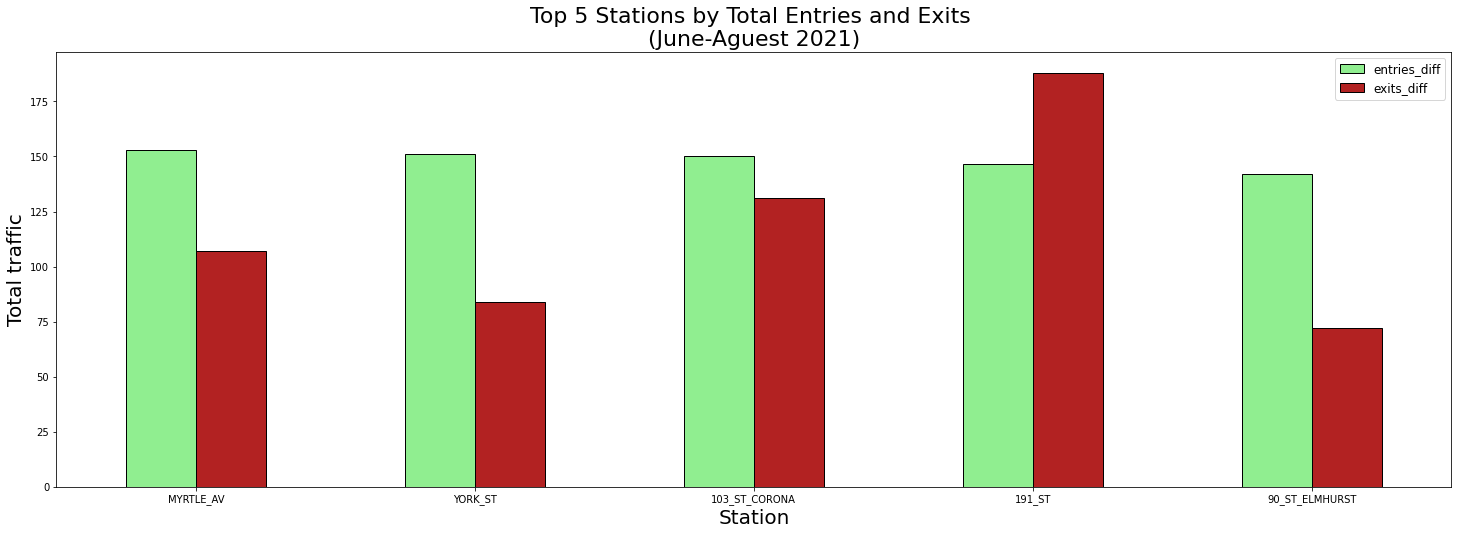

In [139]:
# plot 
top_5 =df_sorted.groupby(['station']).agg({'entries_diff': 'median' ,'exits_diff': 'median'}).sort_values(by = ['entries_diff','exits_diff'], ascending = False).head(5)

fig, ax = plt.subplots(figsize=(25, 8))




top_5.sort_values(by = ['entries_diff','exits_diff'],ascending=False).plot(kind='bar',edgecolor='black',ax=ax,color=['lightgreen','firebrick'])
ax.set_xlabel('Station', fontsize=20)
ax.set_ylabel('Total traffic', fontsize=20)
plt.title('Top 5 Stations by Total Entries and Exits \n(June-Aguest 2021)', fontsize=22, )

plt.xticks(color='black',rotation=360)
plt.yticks(color='black')
ax.legend(prop={'size': 12}).set_visible(True)

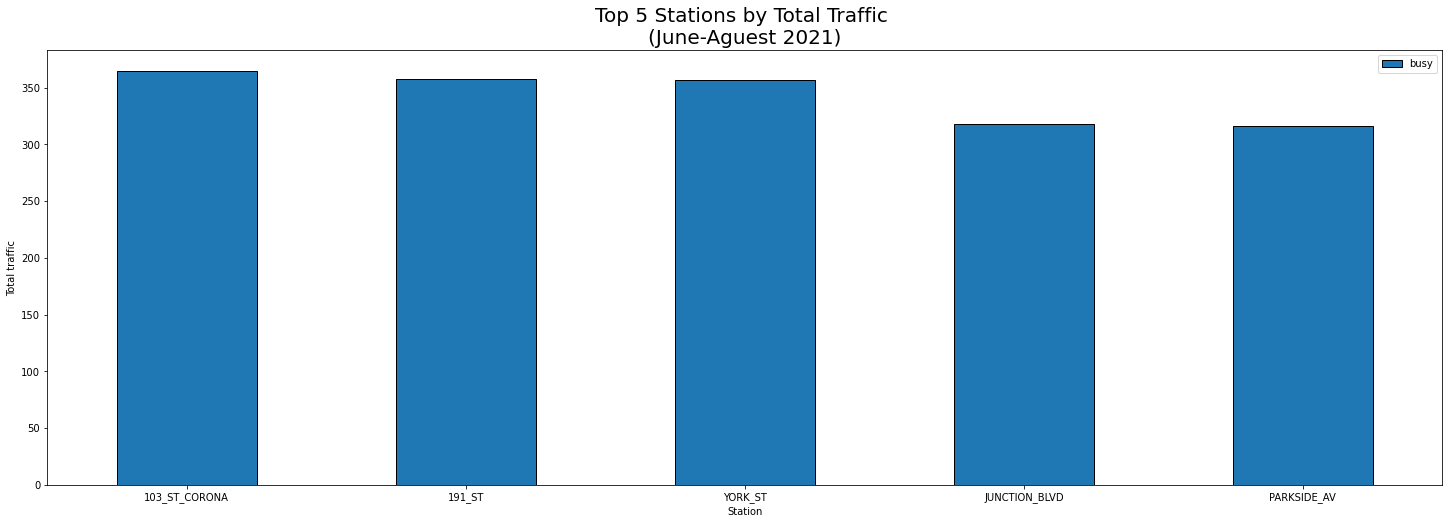

In [125]:
# plot 
top_5 =df_sorted.groupby(['station']).agg({'busy': 'median' }).sort_values(by = 'busy', ascending = False).head(5)

fig, ax = plt.subplots(figsize=(25, 8))




top_5.sort_values(by = 'busy',ascending=False).plot(kind='bar',edgecolor='black',ax=ax)
ax.set(ylabel='Total traffic',xlabel='Station')
plt.title('Top 5 Stations by Total Traffic \n(June-Aguest 2021)', fontsize=20)
#plt.xlable('Station', fontsize=20)
#plt.ylable('Total traffic',fontsize=20)
plt.xticks(color='black',rotation=360)
plt.yticks(color='black')
ax.legend().set_visible(True)

observation: As shown in the above plot our top five stations that we consider to locate our absher machine in is as follows FORDHAM_RD ,WORLD_TRADE_CTR, WALL_ST, BEDFORD_AV and AQUEDUCT_RACETR.

In [ ]:
#ax.set(title='Top 5 Stations by Total Entries and Exits (June-Aguest 2021)',ylabel='Total traffic',xlabel='Station')
#ax.legend().set_visible(False)

In [84]:
# Double check the results
check = df_sorted.groupby("station").busy.sum().reset_index()
c = check.sort_values(by = 'busy', ascending = False)



In [64]:
# Extract the month
df_sorted['month'] = pd.DatetimeIndex(df_sorted['date']).month

<ipython-input-64-5ff38b9abd93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorted['month'] = pd.DatetimeIndex(df_sorted['date']).month


In [74]:
df_sorted

#plot2=[]
#plot2['s'] = df_sorted.groupby("station").busy.sum().reset_index()



,ca,unit,scp,station,linename,division,date,time,desc,entries_cum,exits_cum,Unnamed: 0,datetime,turnstile,entries_diff,exits_diff,busy,month
1,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327,1.0,2021-05-29 04:00:00,A002-R051-02-00-00,6.0,2.0,8.0,5
2,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340,2.0,2021-05-29 08:00:00,A002-R051-02-00-00,9.0,13.0,22.0,5
3,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386,3.0,2021-05-29 12:00:00,A002-R051-02-00-00,40.0,46.0,86.0,5
4,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418,4.0,2021-05-29 16:00:00,A002-R051-02-00-00,108.0,32.0,140.0,5
5,A002,R051,02-00-00,59_ST,NQR456W,BMT,05/29/2021,20:00:00,REGULAR,7579021,2590439,5.0,2021-05-29 20:00:00,A002-R051-02-00-00,124.0,21.0,145.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2710451,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,05:00:00,REGULAR,5554,614,209063.0,2021-08-27 05:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0,8
2710452,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,09:00:00,REGULAR,5554,614,209064.0,2021-08-27 09:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0,8
2710453,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,13:00:00,REGULAR,5554,614,209065.0,2021-08-27 13:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0,8
2710454,TRAM2,R469,00-05-01,RIT_ROOSEVELT,R,RIT,08/27/2021,17:00:00,REGULAR,5554,614,209066.0,2021-08-27 17:00:00,TRAM2-R469-00-05-01,0.0,0.0,0.0,8


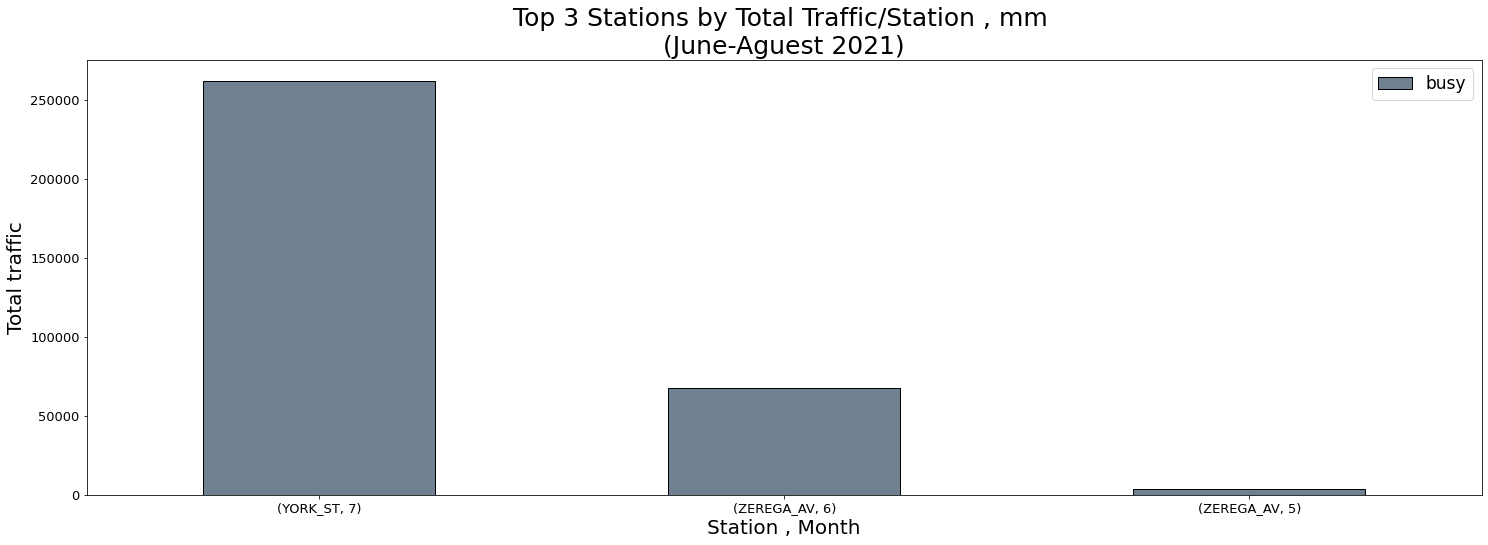

In [178]:
# plot 

 
top_5 =df_sorted.groupby(['station','month']).agg({'busy': sum }).reset_index()

top_5 = top_5.sort_values(by = ["station", 'busy'], ascending = False).head(5)
top_5 = top_5.groupby(['station','month']).first()


top_5 = top_5[:3]



fig, ax = plt.subplots(figsize=(25, 8))




top_5.sort_values(by =["busy"],ascending=False).plot(kind='bar',edgecolor='black',ax=ax, color='slategray')

ax.set_xlabel('Station , Month', fontsize = 20)
ax.set_ylabel('Total traffic', fontsize = 20)

plt.title('Top 3 Stations by Total Traffic/Station , mm \n(June-Aguest 2021)', fontsize=25)

plt.xticks(color='black',rotation=360,fontsize=13)
plt.yticks(color='black',fontsize=13)

ax.legend(prop={'size': 17}).set_visible(True)
